# IMPORTING LIBRARIES AND DATASET

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
!wget https://files.consumerfinance.gov/ccdb/complaints.csv.zip

In [4]:
!unzip complaints.csv.zip

Archive:  complaints.csv.zip
  inflating: complaints.csv          


In [57]:
data=pd.read_csv('complaints.csv')
data.head()

<ipython-input-57-cf36e7c8974c>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-07-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Nelnet, Inc.",IL,61103,NaN,NaN,Web,2023-08-23,Closed with explanation,Yes,NaN,7284490
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,33444,NaN,NaN,Web,2023-08-25,Closed with non-monetary relief,Yes,NaN,7588176
2,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
4,2023-08-23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Information that should be on the report is mi...,NaN,NaN,LEXISNEXIS,FL,32258,NaN,Other,Web,2023-08-23,In progress,Yes,NaN,7442688


# DATA PREPROCESSING

In [58]:
data.describe()

,Complaint ID
count,4.101381e+06
mean,4.350486e+06
std,2.040780e+06
min,1.000000e+00
25%,2.883892e+06
50%,4.294108e+06
75%,6.186028e+06
max,7.593229e+06


In [59]:
data.isna().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        716954
Consumer complaint narrative    2615783
Company public response         2200311
Company                               0
State                             43240
ZIP code                          30213
Tags                            3673906
Consumer consent provided?       903652
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3333023
Complaint ID                          0
dtype: int64

In [60]:
data.shape

(4101381, 18)

In [61]:
data=data.drop(['Tags','Consumer complaint narrative','Company public response','Consumer disputed?'],axis=1)

In [62]:
data.isna().sum()

Date received                        0
Product                              0
Sub-product                     235291
Issue                                0
Sub-issue                       716954
Company                              0
State                            43240
ZIP code                         30213
Consumer consent provided?      903652
Submitted via                        0
Date sent to company                 0
Company response to consumer         5
Timely response?                     0
Complaint ID                         0
dtype: int64

In [63]:
data=data.dropna()

In [64]:
data

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
2,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,Experian Information Solutions Inc.,NJ,07024,Other,Web,2023-08-24,In progress,Yes,7452639
4,2023-08-23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Information that should be on the report is mi...,LEXISNEXIS,FL,32258,Other,Web,2023-08-23,In progress,Yes,7442688
9,2023-07-18,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,HF Holdings,GA,30012,Consent not provided,Web,2023-09-21,Closed with explanation,Yes,7260474
10,2023-07-13,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,"CITIBANK, N.A.",TX,XXXXX,Consent provided,Web,2023-07-13,Closed with explanation,Yes,7244354
12,2023-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32221,Consent provided,Web,2023-06-13,Closed with non-monetary relief,Yes,7108471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101342,2022-10-29,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,CL HOLDINGS LLC,TX,77015,Consent not provided,Web,2022-10-29,Closed with explanation,Yes,6138977
4101368,2022-08-19,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,"EQUIFAX, INC.",CA,95356,Consent not provided,Web,2022-08-19,Closed with explanation,Yes,5898637
4101374,2022-08-16,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,CONTRACT CALLERS INC,VA,23223,Consent not provided,Web,2022-08-16,Closed with explanation,Yes,5882345
4101375,2022-08-13,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,AFNI INC.,FL,33647,Consent not provided,Web,2022-08-13,Closed with explanation,Yes,5875635


In [65]:
data.nunique()

Date received                      3104
Product                              12
Sub-product                          48
Issue                                54
Sub-issue                           235
Company                            5202
State                                62
ZIP code                          24592
Consumer consent provided?            4
Submitted via                         2
Date sent to company               3106
Company response to consumer          6
Timely response?                      2
Complaint ID                    2782113
dtype: int64

# FEATURE ENGINEERING

In [66]:
data['Product'].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Checking or savings account',
       'Credit reporting or other personal consumer reports',
       'Student loan', 'Credit card or prepaid card', 'Mortgage',
       'Credit card', 'Vehicle loan or lease', 'Prepaid card',
       'Payday loan, title loan, or personal loan',
       'Payday loan, title loan, personal loan, or advance loan'],
      dtype=object)

In [67]:
data

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
2,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,Experian Information Solutions Inc.,NJ,07024,Other,Web,2023-08-24,In progress,Yes,7452639
4,2023-08-23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Information that should be on the report is mi...,LEXISNEXIS,FL,32258,Other,Web,2023-08-23,In progress,Yes,7442688
9,2023-07-18,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,HF Holdings,GA,30012,Consent not provided,Web,2023-09-21,Closed with explanation,Yes,7260474
10,2023-07-13,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,"CITIBANK, N.A.",TX,XXXXX,Consent provided,Web,2023-07-13,Closed with explanation,Yes,7244354
12,2023-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32221,Consent provided,Web,2023-06-13,Closed with non-monetary relief,Yes,7108471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101342,2022-10-29,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,CL HOLDINGS LLC,TX,77015,Consent not provided,Web,2022-10-29,Closed with explanation,Yes,6138977
4101368,2022-08-19,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,"EQUIFAX, INC.",CA,95356,Consent not provided,Web,2022-08-19,Closed with explanation,Yes,5898637
4101374,2022-08-16,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,CONTRACT CALLERS INC,VA,23223,Consent not provided,Web,2022-08-16,Closed with explanation,Yes,5882345
4101375,2022-08-13,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,AFNI INC.,FL,33647,Consent not provided,Web,2022-08-13,Closed with explanation,Yes,5875635


In [68]:
data=data.drop(['Date received','Date sent to company','ZIP code','Sub-product'],axis=1)

# TEXT PRPROCESSING (ENCODING)

In [69]:
encoder=LabelEncoder()
columns_to_encode = ['Issue',	'Sub-issue',	'Company',	'State',	'Consumer consent provided?',	'Submitted via',	'Company response to consumer',	'Timely response?',	'Product']
data[columns_to_encode] = data[columns_to_encode].apply(encoder.fit_transform)

In [70]:
data.head()

,Product,Issue,Sub-issue,Company,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Complaint ID
2,4,34,231,1809,39,3,0,4,1,7452639
4,4,23,115,2714,13,3,0,4,1,7442688
9,5,3,67,2282,15,0,0,1,1,7260474
10,0,29,142,895,52,1,0,1,1,7244354
12,4,34,202,4633,13,1,0,3,1,7108471


# MULTICLASS CLASSIFICATION MODELS
## 1) DECISION TREE
## 2) NAIVE BAYES
## 3) KNEARESTNEIGHBORS

In [71]:
classifier1=DecisionTreeClassifier()
classifier2=MultinomialNB()
classifier3=KNeighborsClassifier()

X=data.iloc[:,:-1]
y=data['Product']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [72]:
classifier1.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
classifier2.fit(X_train,y_train)

MultinomialNB()

In [74]:
classifier3.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
y_pred1=classifier1.predict(X_test)
y_pred2=classifier2.predict(X_test)
y_pred3=classifier3.predict(X_test)

# MODEL EVALUATION

In [76]:
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33568
           1       1.00      1.00      1.00       186
           2       1.00      1.00      1.00     47198
           3       1.00      1.00      1.00      2390
           4       1.00      1.00      1.00    601379
           5       1.00      1.00      1.00    119195
           6       1.00      1.00      1.00      1288
           7       1.00      1.00      1.00       678
           8       0.00      0.00      0.00         1
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00     17218
          11       1.00      1.00      1.00     11528

    accuracy                           1.00    834634
   macro avg       0.90      0.92      0.91    834634
weighted avg       1.00      1.00      1.00    834634

[[ 33568      0      0      0      0      0      0      0      0      0
       0      0]
 [     0    186      0      0      0      0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.18      0.31     33568
           1       0.18      0.02      0.03       186
           2       0.10      0.55      0.17     47198
           3       0.07      0.08      0.07      2390
           4       0.91      0.34      0.50    601379
           5       0.29      0.18      0.22    119195
           6       0.00      0.40      0.01      1288
           7       0.00      0.00      0.00       678
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         5
          10       0.30      0.50      0.38     17218
          11       0.37      0.10      0.15     11528

    accuracy                           0.32    834634
   macro avg       0.27      0.20      0.15    834634
weighted avg       0.76      0.32      0.42    834634

[[  6073      8  12927      2   3333    668   6200      0   4357      0
       0      0]
 [     0      3    106      0     22     18 

In [78]:
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97     33568
           1       0.85      0.12      0.21       186
           2       0.97      0.94      0.96     47198
           3       0.97      0.79      0.87      2390
           4       0.99      1.00      0.99    601379
           5       0.98      0.99      0.98    119195
           6       0.70      0.28      0.40      1288
           7       0.54      0.07      0.13       678
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         5
          10       0.98      0.94      0.96     17218
          11       0.97      0.89      0.93     11528

    accuracy                           0.99    834634
   macro avg       0.74      0.58      0.62    834634
weighted avg       0.99      0.99      0.99    834634

[[ 32413      1    461      2    487    194      0      0      0      0
       3      7]
 [     3     22    150      2      9      0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
models=['DecisionTree', 'NavieBayes', 'KNearestNeighbors']
accuracy1=accuracy_score(y_test, y_pred1)
accuracy2=accuracy_score(y_test, y_pred2)
accuracy3=accuracy_score(y_test, y_pred3)
accuracy=[accuracy1,accuracy2,accuracy3]
comparison=pd.DataFrame(accuracy, index=models)
comparison

,0
DecisionTree,0.999999
NavieBayes,0.322683
KNearestNeighbors,0.986255


<Axes: >

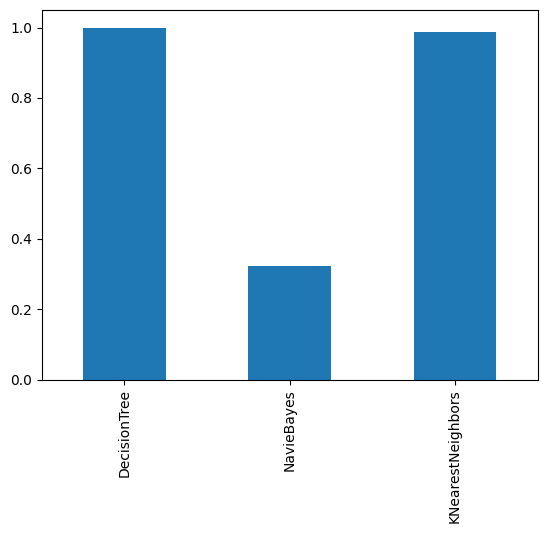

In [80]:
comparison.plot(kind='bar',legend=False)

# MODEL SELECTION
## DECISION TREE OUTPERFORMED THE CLASSIFICATION TASK

# Predictions

In [81]:
predictions=pd.DataFrame(encoder.inverse_transform(y_pred1))
predictions

,0
0,"Credit reporting, credit repair services, or o..."
1,Credit reporting or other personal consumer re...
2,Credit reporting or other personal consumer re...
3,"Credit reporting, credit repair services, or o..."
4,"Credit reporting, credit repair services, or o..."
...,...
834629,Checking or savings account
834630,"Credit reporting, credit repair services, or o..."
834631,"Credit reporting, credit repair services, or o..."
834632,"Credit reporting, credit repair services, or o..."


In [82]:
predictions.iloc[:,0].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting or other personal consumer reports',
       'Debt collection', 'Credit card or prepaid card', 'Student loan',
       'Checking or savings account', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Mortgage',
       'Credit card', 'Prepaid card'], dtype=object)